## Central Limit Theorem

---

Normality underlies many of the inferential techniques that we use in data science.

Consider the random variable $X$. We can take a sample from this population of size $n$ and find the mean of that sample. Let's call this sample mean $x_1$. We can take another sample from this population, also of size $n$, and find the mean of that sample. Let's call this sample mean $x_1$. We can do this over and over until we've calculated the mean of every possible sample of size $n$. If we plotted every sample mean on a histogram, we get another distribution called "the sampling distribution of $\bar{X}$."

**This distribution, the sampling distribution of $\bar{X}$, is Normally distributed even if the distribution of $X$ is not.** (That is, unless some rare conditions are violated).

We can formally define [the central limit theorm](http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf) like so:

> In probability theory, the central limit theorem states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed, regardless of the underlying distribution.

Some properties that arise from the central limit theorem include:

> If $X ~ N(\mu,\sigma)$, then $\bar{X}$ is exactly $N(\mu,\frac{\sigma}{\sqrt{n}})$

> If $X$ is not normally distributed, then $\bar{X}$ is approximately $N(\mu,\frac{\sigma}{\sqrt{n}})$ if the sample size $n$ is at least 30. As $n$ increases, $\bar{X}$ becomes asymptotically normally distributed.

> If $\bar{X}$ is normally distributed, then we can use inferential methods that rely on our sample mean, $\bar{x}$

<a id='additional-resources'></a>

#### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2


In the next few notebooks, we are going to do some Unsupervised Exploration of the `customer` table in our Database.

> What does a data scientist do? PCA on the `customer` table. - Joshua Cook

In [3]:
%run load_data.py

In [4]:
from scipy.stats import skew

In [5]:
skew(customer_features)

array([  2.55258269,   4.03992212,   3.57518722,   5.88782573,
         3.61945758,  11.11353365])

In [6]:
import random 

random.sample(range(10), 2)

[0, 8]

In [7]:
stats = customer_features.describe().T
stats['skew'] = skew(customer_features)
stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534


### Sampling the Dataset 

In this notebook, we begin to explore the `customer` table by sampling the table. First, let's sample three random points and examine them. 

In [8]:
np.random.seed(42)

In [9]:
sample = customer_features.sample(3)

In [10]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
265,5909,23527,13699,10155,830,3636
78,10766,1175,2067,2096,301,167
347,27380,7184,12311,2809,4621,1022


In [11]:
stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534


### Sampling for a Statistical Description

We are able to take the mean and standard deviation of the data, but what if we want to visualize it? 

Of course, this dataset is small, but we might want techniques that work even when the dataset is very large.

Let's start by looking at 1% of the data. 

In [12]:
sample_1pct_1 = customer_features.sample(5)

In [13]:
sample_1pct_1.mean()

Fresh               14123.6
Milk                 5801.0
Grocery              5475.8
Frozen               2812.6
Detergents_Paper     1097.8
Delicatessen         1987.6
dtype: float64

#### How does this compare to the actual mean?

In [14]:
sample_1pct_1.mean() - stats['mean']

Fresh               2123.302273
Milk                   4.734091
Grocery            -2475.477273
Frozen              -259.331818
Detergents_Paper   -1783.693182
Delicatessen         462.729545
dtype: float64

Let's think about this in terms of percent error.

In [15]:
(sample_1pct_1.mean() - stats['mean'])/stats['mean']

Fresh               0.176937
Milk                0.000817
Grocery            -0.311331
Frozen             -0.084420
Detergents_Paper   -0.619017
Delicatessen        0.303455
dtype: float64

#### How does it do?


#### Let's try it again

In [16]:
sample_1pct_2 = customer_features.sample(5)

In [17]:
sample_1pct_2.mean() - stats['mean']

Fresh              -2157.497727
Milk                 484.534091
Grocery             1619.922727
Frozen              -310.531818
Detergents_Paper     524.306818
Delicatessen          39.729545
dtype: float64

In [18]:
(sample_1pct_2.mean() - stats['mean'])/stats['mean']

Fresh              -0.179787
Milk                0.083594
Grocery             0.203731
Frozen             -0.101087
Detergents_Paper    0.181957
Delicatessen        0.026054
dtype: float64

#### How does it do?

#### Repeatedly Sample

Let's do it 10 times.

In [22]:
sample_means = []
for _ in range(10):
    sample_means.append(customer_features.sample(5).mean())

sample_means = np.array(sample_means)
display(sample_means)
display(sample_means.mean(axis=0))

array([[  8620.4,   4810.2,   7272. ,    850.6,   2378.4,   1105.8],
       [ 14765.6,   4903. ,   6606. ,   1570. ,   2762. ,    536. ],
       [ 17832.8,   2507. ,   2154.2,   5003.8,    465.4,    750.6],
       [ 17706.4,   4179. ,   5428.6,   4112. ,   1970.4,   1171.2],
       [ 21854.6,   5030.8,   5978.8,   5466. ,   2458.4,   2297.2],
       [  2777.6,   7086.2,   6673. ,   1574. ,   3065.4,   1291.4],
       [ 10400.2,   4047.4,   6198.8,   3309. ,   2929.4,   1824.8],
       [ 15943.4,   8462. ,  12553. ,  14196.2,   4993.8,   2243.6],
       [  4882.4,   2918. ,   4419.8,   1780.6,    860.2,    464.2],
       [  5893.6,   6609.4,   9324.4,   1998.2,   3741. ,    662.8]])

array([ 12067.7 ,   5055.3 ,   6660.86,   3986.04,   2562.44,   1234.76])

In [20]:
(sample_means.mean(axis=0)-stats['mean'])/stats['mean']

Fresh              -0.105892
Milk                0.108534
Grocery            -0.013132
Frozen              0.000081
Detergents_Paper    0.103324
Delicatessen       -0.288294
Name: mean, dtype: float64

And 50 times.

In [ ]:
sample_means = []
for _ in range(50):
    sample_means.append(customer_features.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

And 100 times.

In [44]:
sample_means = []
for _ in range(100):
    sample_means.append(customer_features.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh              -0.107867
Milk               -0.015597
Grocery             0.045876
Frozen              0.016621
Detergents_Paper    0.061573
Delicatessen        0.009518
dtype: float64

#### What do we notice?

#### Take a larger sample

Totally different. Which makes sense ... we're only taking 1% of the data!

What if we take a sample of 10% of the data?

In [45]:
sample_10pct_1 = customer_features.sample(44)
(sample_10pct_1.mean() - stats['mean'])/stats['mean']

Fresh               0.143301
Milk               -0.329294
Grocery            -0.224996
Frozen             -0.062516
Detergents_Paper   -0.297255
Delicatessen       -0.093410
dtype: float64

#### Is this sample good enough for plotting?

https://stats.stackexchange.com/questions/2541/is-there-a-reference-that-suggest-using-30-as-a-large-enough-sample-size

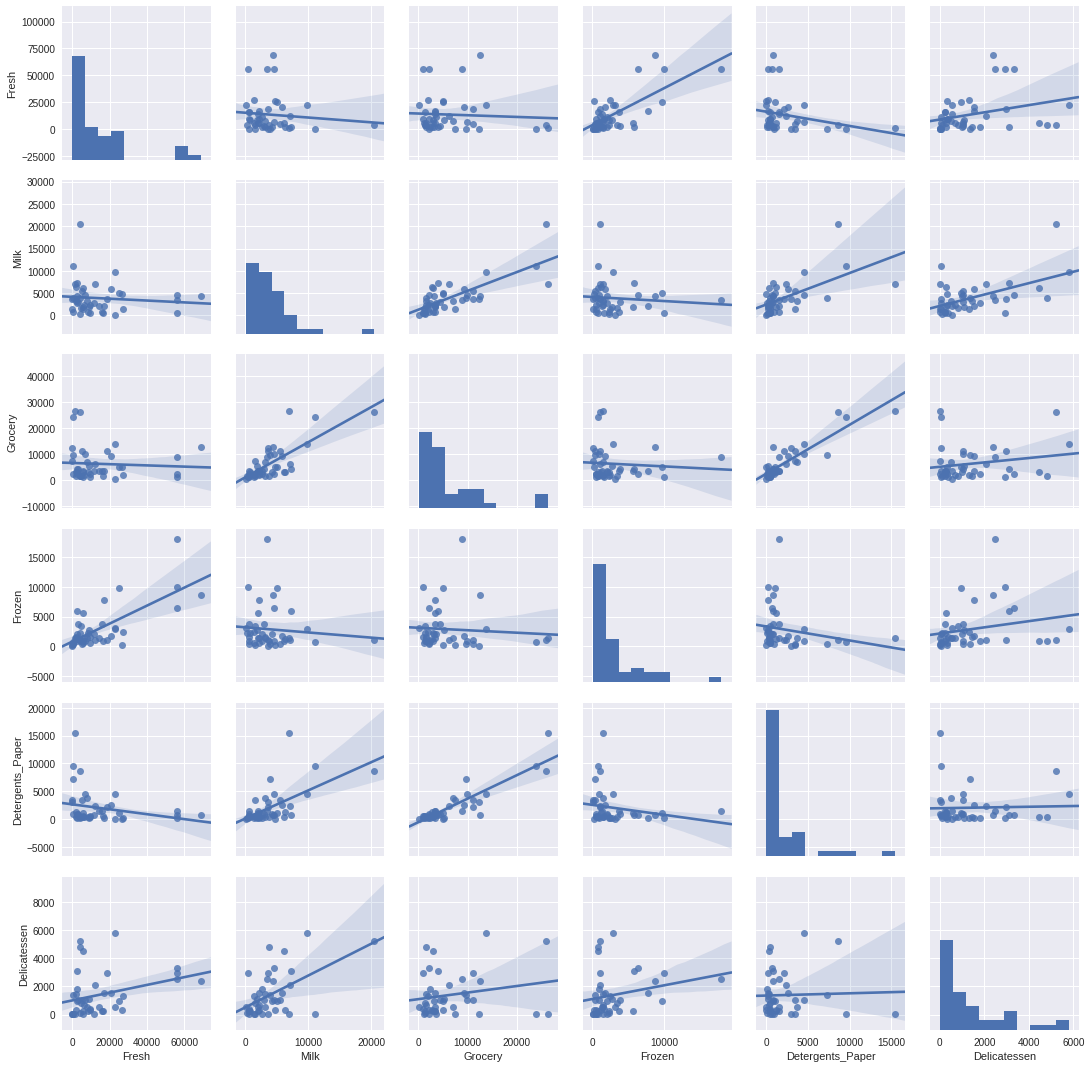

In [46]:
sns.pairplot(sample_10pct_1, kind='reg')